In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../../data/lbp_dataset.csv').drop('Unnamed: 0', axis=1)

In [5]:
df

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,Class
0,0.143038,0.267173,0.215100,0.216615,0.074504,0.083571,0.193235,0.248903,0.188034,0.220549,0.079998,0.069281,0.125786,0.263804,0.214964,0.225908,0.081988,0.087550,1.0
1,0.195245,0.275933,0.150550,0.210944,0.071011,0.096317,0.171749,0.304616,0.135547,0.186612,0.062030,0.139446,0.167050,0.307888,0.137427,0.187657,0.067565,0.132414,1.0
2,0.166801,0.228390,0.173934,0.219829,0.125010,0.086036,0.144477,0.264970,0.194537,0.209175,0.112052,0.074789,0.152082,0.247143,0.194014,0.216962,0.114688,0.075111,1.0
3,0.132227,0.213212,0.199462,0.245464,0.144023,0.065612,0.118307,0.225174,0.223490,0.237005,0.131636,0.064388,0.135243,0.216849,0.201176,0.240234,0.141068,0.065430,1.0
4,0.158395,0.213777,0.168398,0.225421,0.152110,0.081899,0.133103,0.236867,0.233040,0.208608,0.119870,0.068513,0.146905,0.229044,0.203810,0.215680,0.133467,0.071094,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.302541,0.308478,0.094587,0.115576,0.026788,0.152030,0.310135,0.295637,0.094173,0.117785,0.027755,0.154515,0.299365,0.305717,0.108534,0.123308,0.024027,0.139050,7.0
913,0.287436,0.346285,0.137408,0.089620,0.041690,0.097561,0.300908,0.335933,0.118832,0.094016,0.045235,0.105077,0.298922,0.337067,0.129041,0.102950,0.038429,0.093590,7.0
914,0.276357,0.332229,0.260101,0.087437,0.004893,0.038984,0.272569,0.358270,0.176610,0.125631,0.005682,0.061237,0.262153,0.391888,0.179451,0.112532,0.005682,0.048295,7.0
915,0.313504,0.310232,0.132362,0.116300,0.026621,0.100982,0.312165,0.318412,0.122695,0.087448,0.043129,0.116151,0.307258,0.324807,0.116597,0.093397,0.041344,0.116597,7.0


In [6]:
df.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,Class
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,0.232832,0.304924,0.170092,0.142957,0.053090,0.096107,0.232523,0.305087,0.168118,0.140171,0.053338,0.100763,0.232105,0.302025,0.168904,0.142992,0.054576,0.099399,4.577972
std,0.065766,0.058084,0.053503,0.054356,0.040941,0.042764,0.068453,0.058854,0.057508,0.054990,0.037716,0.045982,0.065448,0.057867,0.053512,0.056381,0.039944,0.044707,1.816252
min,0.083279,0.191946,0.000000,0.000000,0.000000,0.000000,0.084534,0.183859,0.000000,0.000000,0.000000,0.000000,0.065262,0.172160,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.178843,0.259444,0.134307,0.105556,0.018608,0.070658,0.177036,0.257905,0.125802,0.101750,0.023081,0.073291,0.180046,0.255907,0.129820,0.103794,0.021625,0.073840,3.000000
50%,0.230357,0.301520,0.168200,0.141732,0.052686,0.091032,0.228386,0.297807,0.170534,0.134372,0.055070,0.093466,0.228286,0.295871,0.171567,0.140847,0.055053,0.092138,5.000000
75%,0.280455,0.340669,0.202079,0.188725,0.074504,0.117773,0.283579,0.342129,0.205724,0.190998,0.074618,0.125726,0.277328,0.338470,0.202870,0.191448,0.075358,0.121088,6.000000
max,0.553095,0.500267,0.348633,0.258350,0.191053,0.256702,0.560680,0.491720,0.349487,0.258536,0.159327,0.270851,0.541566,0.504541,0.342971,0.331743,0.192201,0.264468,7.000000


In [7]:
X = df.values[:, 1:-1].astype(float)
y_multi = df.values[:, -1].astype(float)
y_binary = []
for yi in y_multi:
    if yi in [1, 2, 3]:
        y_binary.append(0)
    elif yi in [4, 5, 6, 7]:
        y_binary.append(1)
y_binary = np.array(y_binary)

In [8]:
R = np.corrcoef(X.T)

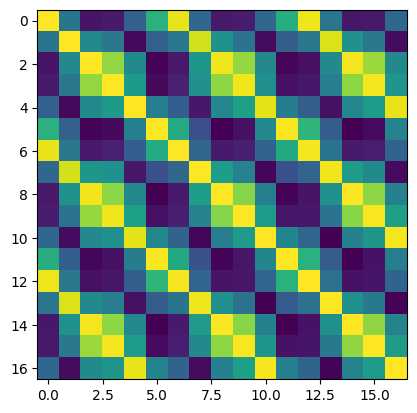

In [9]:
plt.imshow(R)

In [10]:
ind_tr = []
ind_ts = []
for yu in np.unique(y_multi):
    ind = np.where(y_multi == yu)[0]
    np.random.shuffle(ind)
    ind_tr.extend(ind[:int(0.8 * len(ind))].tolist())
    ind_ts.extend(ind[int(0.8 * len(ind)):].tolist())
ind_tr = np.array(ind_tr)
ind_ts = np.array(ind_ts)

In [11]:
Xtr = X[ind_tr]
Xts = X[ind_ts]

ytr_b = y_binary[ind_tr]
yts_b = y_binary[ind_ts]

ytr_m = y_multi[ind_tr]
yts_m = y_multi[ind_ts]

ytr_m = ytr_m - ytr_m.min()
yts_m = yts_m - yts_m.min()

In [12]:
np.unique(yts_m)

array([0., 1., 2., 3., 4., 5., 6.])

In [13]:
mean = Xtr.mean(axis=0)
std = Xtr.std(axis=0)

Xtr = (Xtr - mean) / std
Xts = (Xts - mean) / std

In [14]:
def log_gauss_pdf(x, m, C):
    d = x.shape[1]
    r = (x - m)
    return -0.5 * (d * math.log(2 * math.pi) +
                   np.log(np.linalg.det(C)) +
                   np.einsum('ij,jk,ik->i', r, np.linalg.inv(C), r))

In [15]:
def accuracy(y_true, y_pred):
    return sum(1 * (y_true == y_pred)) / len(y_true)

In [83]:
class LinearDiscriminantAnalysis:
    def __init__(self, reg=1e-6):
        self.reg = reg
        
    def fit(self, X, y):
        self.priors = []
        self.means = []
        covs = []
        for c in np.unique(y):
            ind = np.where(y == c)[0]
            self.priors.append(len(ind) / len(ytr_b))
            self.means.append(X[ind].mean(axis=0))
            covs.append(
                (1 - self.reg) * np.cov(X[ind].T) +
                self.reg * np.eye(X.shape[1]))
        self.priors = np.array(self.priors)
        self.means = np.stack(self.means)
        cov = np.einsum('i,ijk->jk', self.priors, np.stack(covs))
        
        self.eigvals, self.eigvecs = np.linalg.eig(cov)
        self.eigvals = self.eigvals.real
        self.eigvecs = self.eigvecs.real
        
    def predict(self, x):
        alpha = []
        for pi_c, m_c in zip(self.priors, self.means):
            residuals = np.dot(x - m_c, self.eigvecs.T)
            alpha.append(
                math.log(pi_c) - 0.5 * (x.shape[1] * math.log(2 * math.pi) +
                                        np.sum(np.log(self.eigvals.real + 1e-11)) +
                                        np.linalg.norm(residuals, axis=1) ** 2))
        alpha = np.array(alpha).T
        
        return alpha.argmax(axis=1)
    
    def predict_proba(self, x):
        alpha = []
        for pi_c, m_c in zip(self.priors, self.means):
            residuals = np.dot(x - m_c, self.eigvecs.T)
            alpha.append(
                np.exp(math.log(pi_c) - 0.5 * (x.shape[1] * math.log(2 * math.pi) +
                                               np.sum(np.log(self.eigvals.real + 1e-11)) +
                                               np.linalg.norm(residuals, axis=1) ** 2)))
        alpha = np.array(alpha).T
        alpha = alpha / alpha.sum(axis=1)[:, None]
        return alpha

In [99]:
class QuadraticDiscriminantAnalysis:
    def __init__(self, reg=1e-6):
        self.reg = reg
        
    def fit(self, X, y):
        self.priors = []
        self.means = []
        self.eigvals = []
        self.eigvecs = []
        for c in np.unique(y):
            ind = np.where(y == c)[0]
            self.priors.append(len(ind) / len(ytr_b))
            self.means.append(X[ind].mean(axis=0))
            cov = ((1 - self.reg) * np.cov(X[ind].T) +
                   self.reg * np.eye(X.shape[1]))
            D, U = np.linalg.eig(cov)
            self.eigvals.append(np.clip(D.real, a_min=self.reg, a_max=None))
            self.eigvecs.append(U.real)
        self.priors = np.array(self.priors)
        self.means = np.stack(self.means)
        self.eigvals = np.stack(self.eigvals)
        self.eigvecs = np.stack(self.eigvecs)
        
    def predict(self, x):
        alpha = []
        for pi_c, m_c, D_c, U_c in zip(self.priors,
                                       self.means,
                                       self.eigvals,
                                       self.eigvecs):
            A_c = np.dot(np.diag(D_c ** (- 1 / 2)), U_c.T)
            residuals = np.dot(x - m_c, A_c.T)
            alpha.append(
                math.log(pi_c) - 0.5 * (x.shape[1] * math.log(2 * math.pi) +
                                        np.sum(np.log(D_c + 1e-11)) +
                                        np.linalg.norm(residuals, axis=1) ** 2))
        alpha = np.array(alpha).T
        
        return alpha.argmax(axis=1)
    
    def predict_proba(self, x):
        alpha = []
        for pi_c, m_c, D_c, U_c in zip(self.priors,
                                       self.means,
                                       self.eigvals,
                                       self.eigvecs):
            A_c = np.dot(np.diag(D_c ** (- 1 / 2)), U_c.T)
            residuals = np.dot(x - m_c, A_c.T)
            alpha.append(
                np.exp(math.log(pi_c) - 0.5 * (x.shape[1] * math.log(2 * math.pi) +
                                               np.sum(np.log(D_c.real + 1e-11)) +
                                               np.linalg.norm(residuals, axis=1) ** 2)))
        alpha = np.array(alpha).T
        alpha = alpha / alpha.sum(axis=1)[:, None]
        return alpha

In [87]:
lda = LinearDiscriminantAnalysis(reg=1e-9)

In [88]:
lda.fit(Xtr, ytr_b)
lda.predict(Xts)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [89]:
lda.fit(Xtr, ytr_b)
accuracy(yts_b, lda.predict(Xts))

0.7634408602150538

In [91]:
lda.fit(Xtr, ytr_m)
accuracy(yts_m, lda.predict(Xts))

0.41935483870967744

In [97]:
yts_m

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])

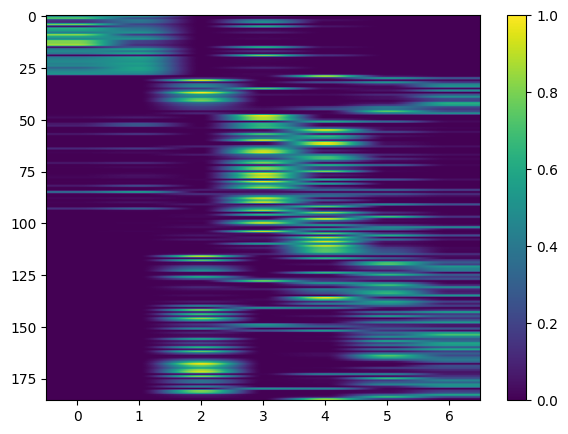

In [96]:
fig = plt.figure(figsize=(7, 5))
im = plt.imshow(lda.predict_proba(Xts), aspect='auto', vmin=0., vmax=1.)
fig.colorbar(im)

In [107]:
qda = QuadraticDiscriminantAnalysis(reg=1e-9)

In [108]:
qda.fit(Xtr, ytr_b)
accuracy(yts_b, qda.predict(Xts))

0.7688172043010753

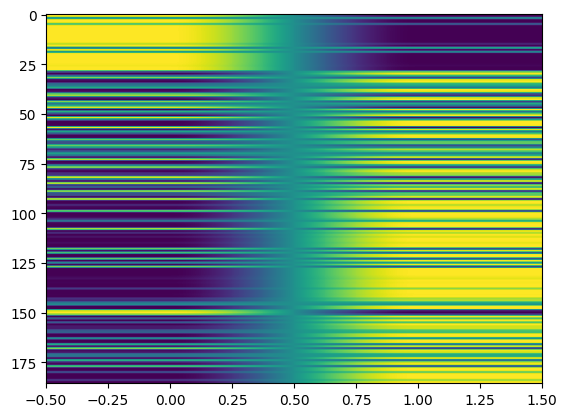

In [109]:
plt.imshow(qda.predict_proba(Xts), aspect='auto')

In [110]:
qda.fit(Xtr, ytr_m)
accuracy(yts_m, qda.predict(Xts))

0.510752688172043

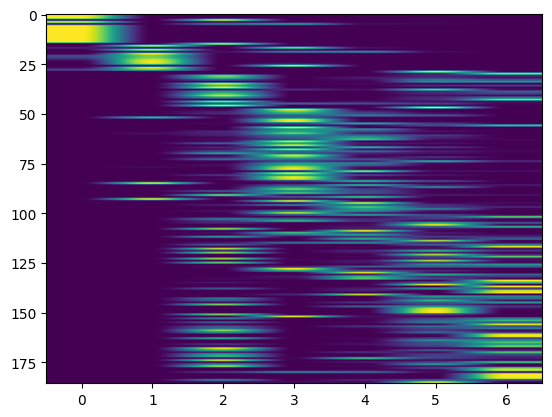

In [111]:
plt.imshow(qda.predict_proba(Xts), aspect='auto')

In [114]:
D = np.linalg.norm(Xtr, axis=1)[:, None] + np.linalg.norm(Xts, axis=1)[None, :] - 2 * np.dot(Xtr, Xts.T)
yts_pred = ytr_b[D.argmin(axis=0)]
accuracy(yts_b, yts_pred)

0.521505376344086

In [115]:
D = np.linalg.norm(Xtr, axis=1)[:, None] + np.linalg.norm(Xts, axis=1)[None, :] - 2 * np.dot(Xtr, Xts.T)
yts_pred = ytr_m[D.argmin(axis=0)]
accuracy(yts_m, yts_pred)

0.2956989247311828

In [116]:
D = 1 - np.dot(Xtr, Xts.T) / (np.linalg.norm(Xtr, axis=1)[:, None] * np.linalg.norm(Xts, axis=1)[None, :])
yts_pred = ytr_b[D.argmin(axis=0)]
accuracy(yts_b, yts_pred)

0.7903225806451613

In [117]:
D = 1 - np.dot(Xtr, Xts.T) / (np.linalg.norm(Xtr, axis=1)[:, None] * np.linalg.norm(Xts, axis=1)[None, :])
yts_pred = ytr_m[D.argmin(axis=0)]
accuracy(yts_m, yts_pred)

0.478494623655914

In [119]:
accs = {
    'm': {'lda': [], 'qda': [], 'l2nn': [], 'cosinenn': []},
    'b': {'lda': [], 'qda': [], 'l2nn': [], 'cosinenn': []}
}

for _ in range(100):
    ind_tr = []
    ind_ts = []
    for yu in np.unique(y_multi):
        ind = np.where(y_multi == yu)[0]
        np.random.shuffle(ind)
        ind_tr.extend(ind[:int(0.8 * len(ind))].tolist())
        ind_ts.extend(ind[int(0.8 * len(ind)):].tolist())
    ind_tr = np.array(ind_tr)
    ind_ts = np.array(ind_ts)

    Xtr = X[ind_tr]
    Xts = X[ind_ts]

    ytr_b = y_binary[ind_tr]
    yts_b = y_binary[ind_ts]

    ytr_m = y_multi[ind_tr]
    yts_m = y_multi[ind_ts]

    ytr_m = ytr_m - ytr_m.min()
    yts_m = yts_m - yts_m.min()

    mean = Xtr.mean(axis=0)
    std = Xtr.std(axis=0)

    Xtr = (Xtr - mean) / std
    Xts = (Xts - mean) / std
    
    lda = LinearDiscriminantAnalysis(reg=1e-9)
    qda = QuadraticDiscriminantAnalysis(reg=1e-9)

    lda.fit(Xtr, ytr_b)
    accs['b']['lda'].append(accuracy(yts_b, lda.predict(Xts)))

    lda.fit(Xtr, ytr_m)
    accs['m']['lda'].append(accuracy(yts_m, lda.predict(Xts)))

    qda.fit(Xtr, ytr_b)
    accs['b']['qda'].append(accuracy(yts_b, qda.predict(Xts)))

    qda.fit(Xtr, ytr_m)
    accs['m']['qda'].append(accuracy(yts_m, qda.predict(Xts)))

    D = np.linalg.norm(Xtr, axis=1)[:, None] + np.linalg.norm(Xts, axis=1)[None, :] - 2 * np.dot(Xtr, Xts.T)
    yts_pred = ytr_b[D.argmin(axis=0)]
    accs['b']['l2nn'].append(accuracy(yts_b, yts_pred))

    D = np.linalg.norm(Xtr, axis=1)[:, None] + np.linalg.norm(Xts, axis=1)[None, :] - 2 * np.dot(Xtr, Xts.T)
    yts_pred = ytr_m[D.argmin(axis=0)]
    accs['m']['l2nn'].append(accuracy(yts_m, yts_pred))

    D = 1 - np.dot(Xtr, Xts.T) / (np.linalg.norm(Xtr, axis=1)[:, None] * np.linalg.norm(Xts, axis=1)[None, :])
    yts_pred = ytr_b[D.argmin(axis=0)]
    accs['b']['cosinenn'].append(accuracy(yts_b, yts_pred))

    D = 1 - np.dot(Xtr, Xts.T) / (np.linalg.norm(Xtr, axis=1)[:, None] * np.linalg.norm(Xts, axis=1)[None, :])
    yts_pred = ytr_m[D.argmin(axis=0)]
    accs['m']['cosinenn'].append(accuracy(yts_m, yts_pred))

In [120]:
support = ['lda', 'qda', 'l2nn', 'cosinenn']

y = []
yerr = []
for s in support:
    mean, std = np.mean(accs['b'][s]), np.std(accs['b'][s])
    y.append(mean)
    yerr.append(std)

In [121]:
y

[0.7453225806451613,
 0.8102688172043011,
 0.5981182795698925,
 0.8086559139784947]

<BarContainer object of 4 artists>

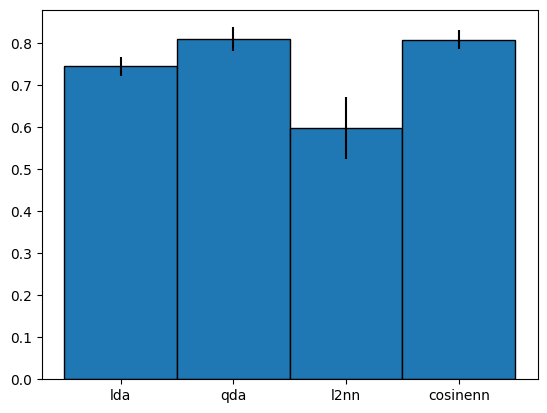

In [122]:
plt.bar(support, y, yerr=yerr, width=1, edgecolor='k')

In [123]:
support = ['lda', 'qda', 'l2nn', 'cosinenn']

y = []
yerr = []
for s in support:
    mean, std = np.mean(accs['m'][s]), np.std(accs['m'][s])
    y.append(mean)
    yerr.append(std)

<BarContainer object of 4 artists>

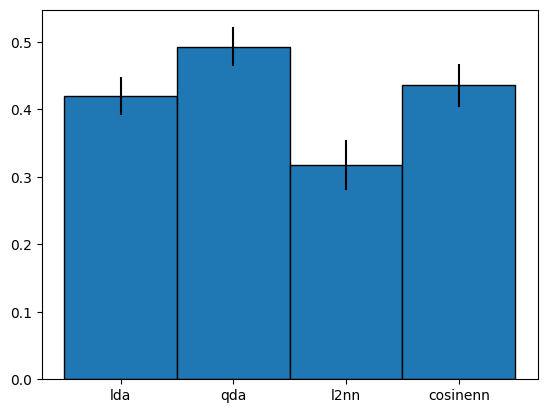

In [124]:
plt.bar(support, y, yerr=yerr, width=1, edgecolor='k')

In [125]:
y

[0.42037634408602154,
 0.4927956989247312,
 0.3179032258064517,
 0.4358064516129032]

In [145]:
lda = LinearDiscriminantAnalysis(reg=1e-9)
qda = QuadraticDiscriminantAnalysis(reg=1e-9)

lda.fit(Xtr, ytr_b)
yts_lda_b_pred = lda.predict(Xts)

lda.fit(Xtr, ytr_m)
yts_lda_m_pred = lda.predict(Xts)

qda.fit(Xtr, ytr_b)
yts_qda_b_pred = qda.predict(Xts)

qda.fit(Xtr, ytr_m)
yts_qda_m_pred = qda.predict(Xts)

D = np.linalg.norm(Xtr, axis=1)[:, None] + np.linalg.norm(Xts, axis=1)[None, :] - 2 * np.dot(Xtr, Xts.T)
yts_l2nn_b_pred = ytr_b[D.argmin(axis=0)]

D = np.linalg.norm(Xtr, axis=1)[:, None] + np.linalg.norm(Xts, axis=1)[None, :] - 2 * np.dot(Xtr, Xts.T)
yts_l2nn_m_pred = ytr_m[D.argmin(axis=0)]

D = 1 - np.dot(Xtr, Xts.T) / (np.linalg.norm(Xtr, axis=1)[:, None] * np.linalg.norm(Xts, axis=1)[None, :])
yts_cosinenn_b_pred = ytr_b[D.argmin(axis=0)]

D = 1 - np.dot(Xtr, Xts.T) / (np.linalg.norm(Xtr, axis=1)[:, None] * np.linalg.norm(Xts, axis=1)[None, :])
yts_cosinenn_m_pred = ytr_m[D.argmin(axis=0)]

In [146]:
cmat = np.zeros([len(np.unique(ytr_m)), len(np.unique(ytr_m))])

for c1 in np.unique(yts_m):
    for c2 in np.unique(yts_m):
        ind = np.intersect1d(
            np.where(yts_m == c1)[0],
            np.where(yts_lda_m_pred == c2)[0]
        )
        cmat[int(c1), int(c2)] = len(ind)

<AxesSubplot: >

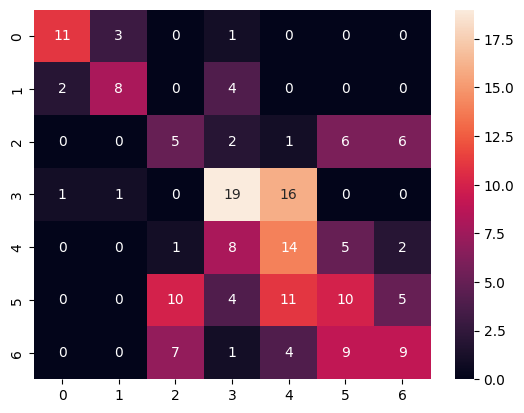

In [147]:
sns.heatmap(cmat, annot=True)

In [148]:
cmat = np.zeros([len(np.unique(ytr_m)), len(np.unique(ytr_m))])

for c1 in np.unique(yts_m):
    for c2 in np.unique(yts_m):
        ind = np.intersect1d(
            np.where(yts_m == c1)[0],
            np.where(yts_qda_m_pred == c2)[0]
        )
        cmat[int(c1), int(c2)] = len(ind)

<AxesSubplot: >

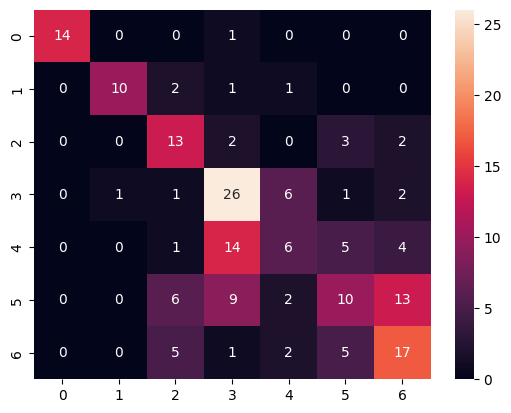

In [149]:
sns.heatmap(cmat, annot=True)